# Linear Regression

## Table of Content

* [Task 1 - Preprocessing](#t1)
* [Task 2 - Linear Regression Equation](#t2)
* [Task 3 - Visualisation of input features](#t3)
* [Task 4 - RMSE and R squared functions](#t4)
* [Task 5 - Gradient descent function](#t5)
* [Task 6 - Normalisation of input features](#t6)
* [Task 7 - Split dataset into train and test](#t7)
* [Task 8 - Implementation of user-defined gradient descent function](#t8)
* [Task 9 - Implementation using official SkLearn library - linear regression](#t9)
* [Feature Selection](#feature)
* [Final Model & Additional Findings](#final)

## <a id="t1"> Task 1 </a>

No preprocessing is required for the data as there is no missing values or non-numeric categorical variables. Outlier handling was deemed unnecessary due to the low number of data points and to avoid introducing unnecessary biases to the data set. However, there is a need to normalise and rescale the input features to ensure that they are of common scale and preventing any unequal contribution to the model and analysis. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import scipy.stats as stats
%matplotlib inline

In [2]:
# Taken from "housing.names" file
header=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("data/housing.data", names=header, delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Shape of dataframe
df.shape

(506, 14)

In [4]:
# Info of dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Based on the summary above, we can see that there is no missing value in the data as all columns contain 506 non-null values. 

This is also affirmed by the "housing.names" file where it indicates that there is no missing attribute values in the data in point 8. 

In [5]:
# Summary statistics of dataframe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


[Text(0.5, 1.0, 'Correlation Matrix')]

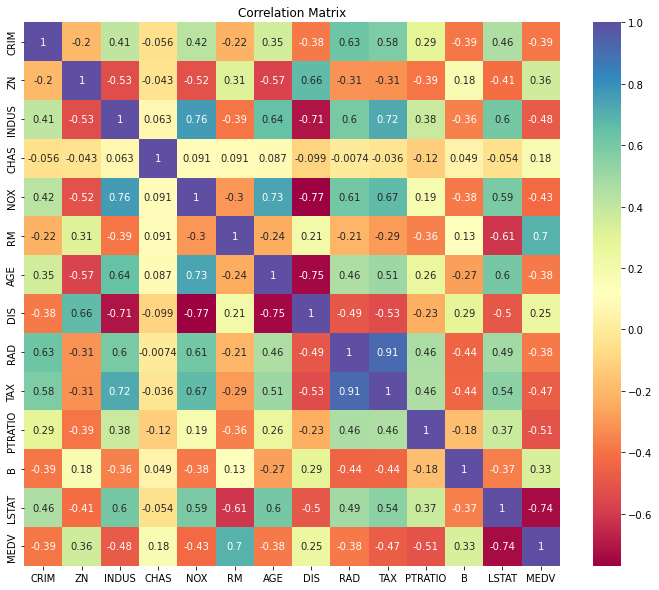

In [6]:
# Correlation matrix
corr = df.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

From the above correlation matrix, we note that the following pairs of independent variables have relatively high correlation: 

1. 0.91: RAD and TAX 
2. 0.76: NOX and INDUS 
3. -0.77: DIS and NOX  
4. -0.75: AGE and NOX 

This might result in a multicollinearity problem where independent variables in the model regression model are correlated. As linear regression assumes that the features should be independent, we may want to consider dropping one of the columns which are highly correlated.

Additionally, we note that RM, average number of rooms per dwelling, and LSTAT, percentage lower status of population, have a relatively high correlation with MEDV, median value of owner-occupied homes (in thousands). 

However, feature selection would be done at a later stage using backward elimination to remove features that do not have a significant effect on the dependent variable or prediction of output. 

## <a id="t2">Task 2</a>

### Linear Regression Equation 

As there are a total of 13 input parameters, the linear regression to predict the housing prices in Boston is defined as follows. The objective is to determine the $\beta_{0}$, y-intercept, and $\beta_{1}, \beta_{2},...,\beta_{13}$, coefficients or weights, such that the root mean squared error is minimised.

For a unit increase in the input factor, the ouput (or independent variable) would increase or decrease based on the weights $\beta_{1}, \beta_{2},...,\beta_{13}$ respectively. 

Links to finalised regression equations as follows:
* [Regression equation for all 13 input features](#r13)
* [Regression equation for 10 input features (after feature selection)](#r10)

$Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{3} + \beta_{4}X_{4}+ \beta_{5}X_{5} + \beta_{6}X_{6} + \beta_{7}X_{7} + \beta_{8}X_{8} + \beta_{9}X_{9} + \beta_{10}X_{10} + \beta_{11}X_{11} + \beta_{12}X_{12} + \beta_{13}X_{13}$

where 
- $\beta_{1}, \beta_{2}, ..., \beta_{13}$ represents the weights of each independent variable; 
- $X_{1}, X_{2}, ..., X_{13}$ represents the features or independent variables of CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT;
- $Y$ represents the dependent variable of MEDV that we want to predict; and 
- $\beta_{0}$ represents the bias coefficient or y-intercept.


Assumptions of Linear Regression: 
1. Relationship between the independent variables and the dependent variable is linear. 
2. No multicollinearity. Input features must be independent of each other. 
3. Errors should follow a constant variance (i.e., homoscadicity).
4. Both dependent variable and error terms follow a normal distribution.

<i>Disclaimer: Feature selection may be conducted to remove the features that are not significant contributors to predict the output. As such, there is a possibility that not all input features would be used in the final model.</i> 

## <a id="t3">Task 3</a>

In this section, Variance inflation factor (VIF) is used to determine the features to be plotted against the output, MEDV (Median value of owner-occupied homes in $1000's). 

VIF is the measure of the amount of multicollinearity in a set of multiple regression variables. Generally, VIF of above 4 would suggest that multicollinearity might exist, and further investigation is required. VIF which exceeds 10 would be regarded as indicating multicollinearity.

In [7]:
# UDF for calculating vif value
import statsmodels.api as sm

def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [8]:
vif_cal(df, 'MEDV')

,Var,Vif
10,PTRATIO,85.03
5,RM,77.95
4,NOX,73.89
9,TAX,61.23
6,AGE,21.39
11,B,20.10
8,RAD,15.17
7,DIS,14.70
2,INDUS,14.49
12,LSTAT,11.10


Based on the VIF calculated above, we will be plotting the following input features against the output. 

1. CHAS - Charles River dummy variable (=1 if tract bounds river; 0 otherwise)
2. CRIM - Per capita crime rate by town
3. ZN - Proportion of residential land zoned for lots over 25,000 sq. ft.
4. DIS - Weighted distance to five Boston employment centres
5. LSTAT - % lower status of the population

__1. Box plot for the categorical variable CHAS (Charles River dummy variable) against MEDV (Median value of owner-occupied homes in $1000's)__

[Text(0.5, 0, 'Presence of tract bound Charles River'),
 Text(0, 0.5, 'Median housing price in thousands'),
 Text(0.5, 1.0, 'Presence of tract bound Charles River against Median housing prices')]

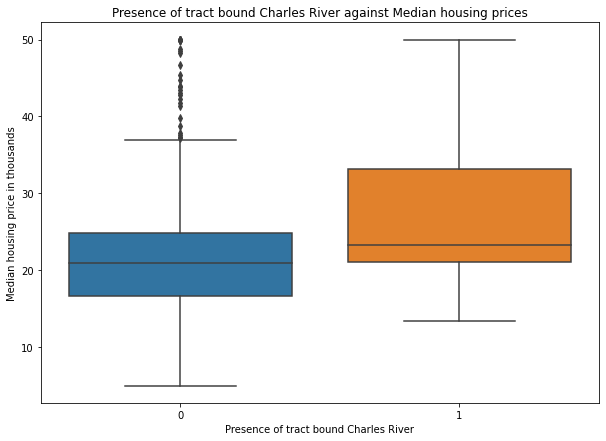

In [9]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x=df['CHAS'], y=df['MEDV'])
ax.set(xlabel='Presence of tract bound Charles River', ylabel='Median housing price in thousands', 
       title="Presence of tract bound Charles River against Median housing prices")

__2. Joint point of CRIM (Per capita crime rate by town) against MEDV (Median value of owner-occupied homes in $1000's)__

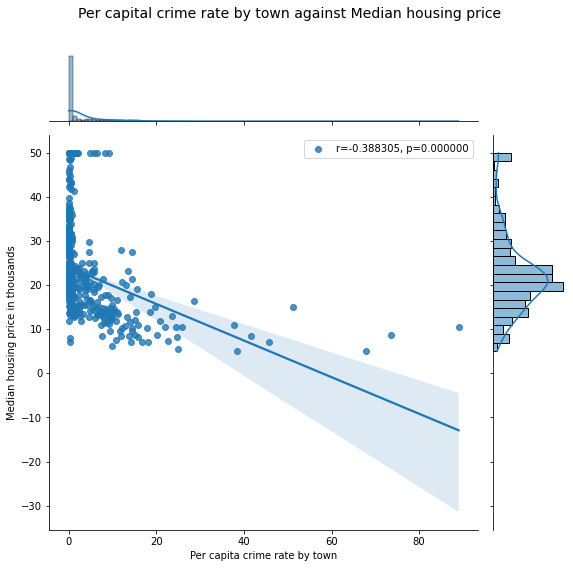

In [10]:
ax2 = sns.jointplot(x=df['CRIM'], y=df['MEDV'], kind="reg", height=8)
r, p = stats.pearsonr(df['CRIM'], df['MEDV'])
ax2.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax2.ax_joint.set_xlabel('Per capita crime rate by town')
ax2.ax_joint.set_ylabel('Median housing price in thousands')
ax2.fig.suptitle("Per capital crime rate by town against Median housing price", fontsize=14)
ax2.fig.subplots_adjust(top=0.90) 

__3. Joint plot of ZN (Proportion of residential land zoned for lots over 25,000 sq. ft.) against MEDV (Median value of owner-occupied homes in $1000's)__

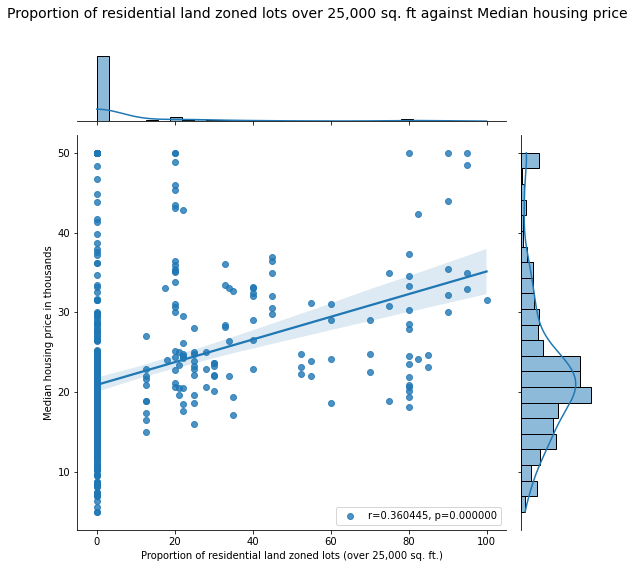

In [11]:
ax3 = sns.jointplot(x=df['ZN'], y=df['MEDV'], kind='reg', height=8)
r, p = stats.pearsonr(df['ZN'], df['MEDV'])
ax3.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax3.ax_joint.set_xlabel('Proportion of residential land zoned lots (over 25,000 sq. ft.)')
ax3.ax_joint.set_ylabel('Median housing price in thousands')
ax3.fig.suptitle("Proportion of residential land zoned lots over 25,000 sq. ft against Median housing price", fontsize=14)
ax3.fig.subplots_adjust(top=0.90) 

__4. Joint plot of DIS (Weighted distances to five Boston employment centres) against MEDV (Median value of owner-occupied homes in $1000's)__

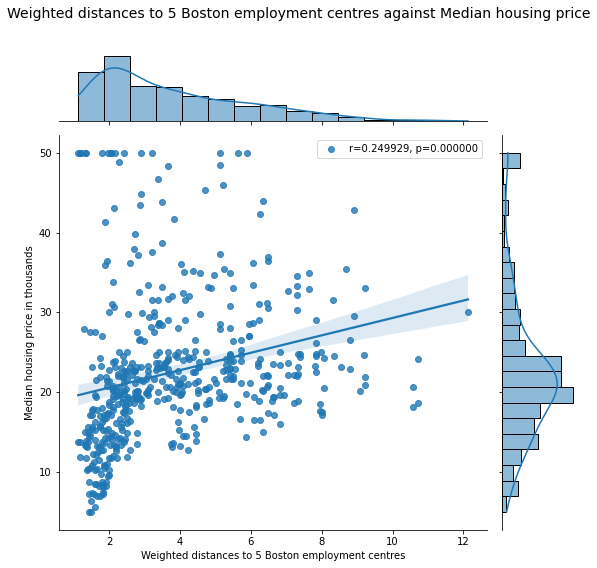

In [12]:
ax4 = sns.jointplot(x=df['DIS'], y=df['MEDV'], kind='reg', height=8)
r, p = stats.pearsonr(df['DIS'], df['MEDV'])
ax4.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax4.ax_joint.set_xlabel('Weighted distances to 5 Boston employment centres')
ax4.ax_joint.set_ylabel('Median housing price in thousands')
ax4.fig.suptitle("Weighted distances to 5 Boston employment centres against Median housing price", fontsize=14)
ax4.fig.subplots_adjust(top=0.90) 

__5. Joint plot of LSTAT (% lower status of the population) against MEDV (Median value of owner-occupied homes in $1000's)__

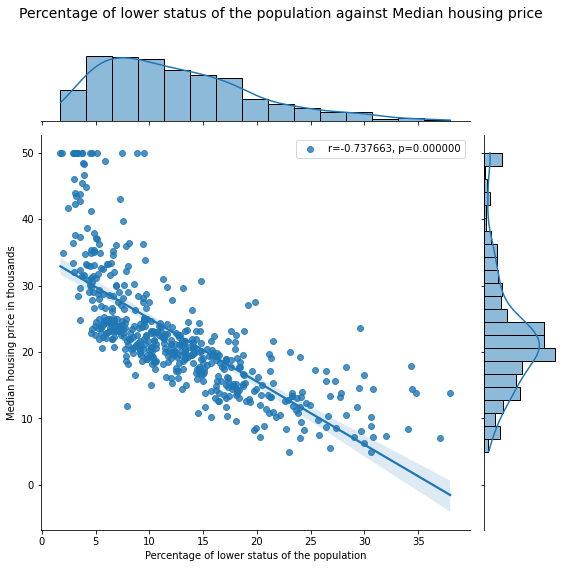

In [13]:
ax5 = sns.jointplot(x=df['LSTAT'], y=df['MEDV'], kind='reg', height=8)
r, p = stats.pearsonr(df['LSTAT'], df['MEDV'])
ax5.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax5.ax_joint.set_xlabel('Percentage of lower status of the population')
ax5.ax_joint.set_ylabel('Median housing price in thousands')
ax5.fig.suptitle("Percentage of lower status of the population against Median housing price", fontsize=14)
ax5.fig.subplots_adjust(top=0.90) 

## <a id="t4">Task 4</a>

Root Mean Square Error (RMSE) is as a measure for evaluating the predictions of a linear regression model. It shows the difference between the predicted and actual values using Euclidean distance. 

$RMSE = \sqrt{\frac{\sum \limits _{i=1} ^{N} (y_{i} - \hat{y})^2}{N}}$

where 
* $y_{i}$ - actual value of output 
* $\hat{y}$ - predicted value of output 
* N - number of data points

In [14]:
# RMSE Function
def rmse(y_test, y_pred):
    '''
    Calculate the root mean squared error for the predictions of a linear regression model.
    Inputs:
        1. y_test : list or array of true values 
        2. y_pred : list or array of predicted values 
    Output:
        1. rsme : root mean squared error in float format
    '''
    N = len(y_test)
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    mse = np.sum((y_test - y_pred)**2) / N 
    rmse = np.sqrt(mse)
    return rmse

R squared is a measure of how far or close the true data points are to the fitted line. It represents the proportion of variation of data points explained by the linear regression model. 

$R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum \limits _{i=i} ^{N}(y_{i} - \hat{y})^2}{\sum \limits _{i=i} ^{N}(y_{i} - \bar{y})^2}$

where 
* RSS - sum of squares of residuals 
* TSS - total sum of squares
* $y_{i}$ - actual value of output
* $\hat{y}$ - predicted value of output
* $\bar{y}$ - mean value of output
* N - number of data points

In [15]:
# R-square Function 
def r2(y_test, y_pred):
    '''
    Calculate the r squared of the predictions of a linear regression model
    Inputs:
        1. y_test : list or array of true values 
        2. y_pred : list or array of predicted values 
    Output:
        1. r_squared : R squared in float format
    '''
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    y_avg = np.mean(y_test)
    r_squared = 1 - (np.sum((y_test-y_pred)**2)/np.sum((y_test-y_avg)**2))
    return r_squared

## <a id="t5">Task 5</a>

__Gradient descent__ is an optimisation algorithm to minimise the convex objective function by iterations. A convex function is one where there is only one local minimum.  

The steps for gradient descent are as follows: 
1. Initialise a random values for the weights and bias
2. Calculate the predicted values of y using the initialised weights and bias
3. Calculate and log the RMSE and R square of each pair of input and output values. 
4. Update the weight and bias by a scale of the learning rate towards the direction where the error is minimised. 
    * $bias (\beta_{0}) = bias - \alpha  (\frac{2}{N}\sum (y - \hat{y})^2)$
    * $weights (\beta_{0}, \beta_{1},..., \beta_{13}) = weights - \alpha  (\frac{2}{N}\sum(X(y - \hat{y}))^2)$
5. Repeat the process until the minimum RMSE is achieved or no further improvement is possible. 

In [16]:
def gradient_descent(X, y, a = 0.25, epoch = 1000): 
    '''
    Gradient descent function that takes in the input features, output, learning rate (optional) and epoch
    (optional) and return the predicted values based on the best estimate of bias and weights based on the 
    inputs given. The function also returns the final estimates of bias, weights and fitting logs. 
    
    Inputs: 
        1. X : list or array of input features 
        2. y : list or array of output 
        3. a : alpha or learning rate in float 
        4. epoch : number of iterations to fit and estimate the bias and weights in integer 
        
    Outputs: 
        1. y_hat : list or array of predicted output
        2. b : estimated bias in float 
        3. weights : list or array of estimated weights of the input features in list or array 
        4. logs_df : pandas dataframe of the iteration, RMSE, and R squared logs
    '''
    dim = len(X.columns)
    X = np.array(X)
    y = np.array(y)
    # Initialise a random bias/beta0 (represented by b) and weights for the regression equation 
    b = np.random.random()
    logs_df = pd.DataFrame(columns=['RMSE', 'R squared'])
    log_ind = 0
    root_mse = 0
    rsquared = 0
    weights = np.random.rand(dim)
    for e in range(0, epoch+1):
        # Calculate the predicted values of y 
        y_hat = b + np.dot(X, weights)
        # Calculate and log RSME and R squared
        root_rmse = rmse(y, y_hat)
        rsquared = r2(y, y_hat)
        if log_ind%10==0:
            logs_df.loc[log_ind] = [root_rmse, rsquared]
        log_ind += 1
        # Update bias/bias0 and weights
        b = b - a*((np.sum(y_hat - y)*2)/len(y))
        weights = weights - a*((np.dot((y_hat-y),X)*2)/len(y))
    return y_hat, b, weights, logs_df 

Learning rate is a hyperparameter that controls how much to scale the bias and weights in the above gradient descent algorithm. The small learning rate rate might result in a greater number of iterations (i.e., computation resources) to find the bias and weights that minimises the RMSE. However, a learning rate too large may result in sub-optimal set of bias and weights that is far off the global minimum. 

In this practicum, we can list out the potential learning rate in a list and check which one is optimal for the use case. For those learning rate which doesn't result in a reduction in RMSE would automatically be removed from the list. After trial and error, the learning rate above 0.27 is disregarded as it's deemed to be too large and doesn't reduce the RMSE. 

With reference to the graph below, the learning rate selected is __0.25__ as it converges the RMSE score fastest with lower number of iterations required.   

[Text(0.5, 0, 'No. of iterations'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'No. of iterations against RMSE for 0.01, 0.05, 0.1, 0.25, 0.26 learning rate')]

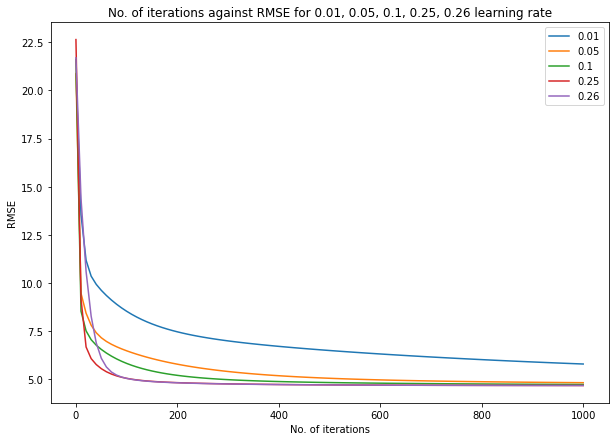

In [20]:
# Note: Run the normalisation of dataframe in the next two cells first.
a = [0.01, 0.05, 0.1, 0.25, 0.26]
features = df_norm[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
               'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
output = df_norm['MEDV']
xaxis = [x for x in range (0, 1001, 10)]
plt.figure(figsize=(10,7))
for val in a: 
    y_hat, b, weights, logs_df = gradient_descent(X=features, y=output, a=val)
    ax = sns.lineplot(x=xaxis, y=logs_df['RMSE'], label=str(val))
ax.set(xlabel='No. of iterations', ylabel='RMSE', 
       title="No. of iterations against RMSE for 0.01, 0.05, 0.1, 0.25, 0.26 learning rate")

## <a id="t6">Task 6</a>

Normalisation of the input features to ensure that they are on a common scale. This is to prevent any unequal contributions of certain higher scaled features to the model which may result in inaccuracy and bias. 

In [18]:
# Modified dataNorm() function from Practicum 1
def dataNorm(X): 
    # Normalise data points
    length = len(X.columns)
    for i in range(0, length-1): 
        col = X.iloc[:,i]
        max_val = col.max() 
        min_val = col.min() 
        X.iloc[:,i] = (col-min_val)/(max_val-min_val)
    return X

In [21]:
df_norm = dataNorm(df)
df_norm.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


## <a id="t7">Task 7</a>

Split the normalised input features and output to train and test set using the splitTT function built in Practicum 1. The function may be modified slightly to suit the dataset.

In [22]:
# Modified splitTT function from Practicum 1
np.random.seed(42)
def splitTT(X_norm, percentTrain): 
    # Split dataset into train and test set based on the percentTrain specified
    # Random shuffling of data before splitting
    np.random.shuffle(np.array(X_norm))
    pd.DataFrame(X_norm)
    # Get index to split the data and slice the dataset based on the index
    index = round(len(X_norm)*percentTrain)
    X_train, X_test = X_norm.iloc[:index,:], X_norm.iloc[index:,:]
    X_split = [X_train, X_test]
    return X_split

In [23]:
df_split = splitTT(df_norm, 0.9)
print("Train set shape: ",df_split[0].shape)
print("Test set shape: ", df_split[1].shape)

Train set shape:  (455, 14)
Test set shape:  (51, 14)


In [24]:
X_train = df_split[0].iloc[:, :13]
y_train = df_split[0].iloc[:, -1]
X_test = df_split[1].iloc[:, :13]
y_test = df_split[1].iloc[:, -1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 13)
(455,)
(51, 13)
(51,)


## <a id="t8">Task 8</a>

In this section, we will run the gradient_descent user-defined function about and compute the predicted output, bias and weights. The function would also return a log of all the RMSE and R squared scores for every 10 iterations. 

In [25]:
y_hat_train, b, w, log = gradient_descent(X_train,y_train)

The bias and weights for all 13 features are as follows. 

In [26]:
print(f"Bias or y-intercept: {b}")
print("Weights or coefficients: ", w)

Bias or y-intercept: 23.973695032824587
Weights or coefficients:  [ -8.28058783   4.63835339   0.97213776   2.5430765   -7.97708024
  21.33297162   1.03887184 -14.68217555   7.68876409  -7.61850775
  -8.30263974   4.20603954 -19.60573521]


In [27]:
print("Log of RMSE and R Square values for every 10 iterations")
log

Log of RMSE and R Square values for every 10 iterations


,RMSE,R squared
0,21.516441,-4.147002
10,7.805922,0.322574
20,6.669541,0.505455
30,6.241538,0.566892
40,5.940854,0.607616
...,...,...
960,4.825017,0.741172
970,4.824816,0.741194
980,4.824623,0.741214
990,4.824438,0.741234


From the logs above, we can see that the RMSE and R squared values for the train dataset is 4.824 and 0.741 respectively. 

[Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'Median house prices in thousands'),
 Text(0.5, 1.0, 'Actual vs predicted median house prices in thousands (Train data set)')]

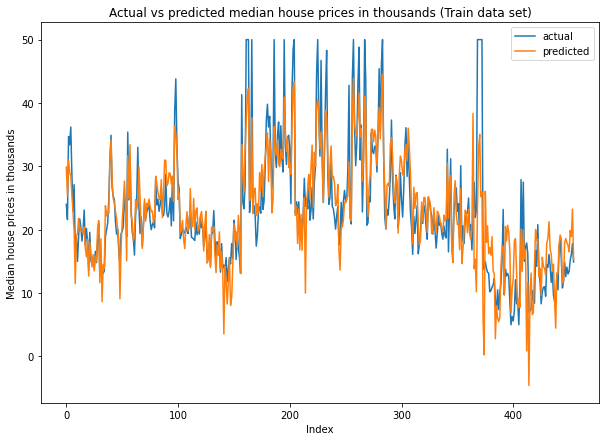

In [28]:
idx = [i for i in range(0, 455, 1)]
plt.figure(figsize=(10,7))
ax = sns.lineplot(x=idx, y=y_train, label="actual")
ax = sns.lineplot(x=idx, y=y_hat_train, label="predicted")
ax.set(xlabel='Index', ylabel='Median house prices in thousands', 
       title="Actual vs predicted median house prices in thousands (Train data set)")

We then use the bias and weights obtained using the train dataset to calculate the predicted house prices for the test data set. 

In [29]:
y_hat_test = b + np.dot(X_test, w)

In [30]:
root_mse = rmse(y_test, y_hat_test)
r_squared = r2(y_test, y_hat_test)

print("13 Input Features:")
print(f"RMSE for test set: {root_mse:.3f}")
print(f"R_squared for test set: {r_squared:.3f}")

13 Input Features:
RMSE for test set: 3.284
R_squared for test set: 0.430


[Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'Median house prices in thousands'),
 Text(0.5, 1.0, 'Actual vs predicted median house prices in thousands (Test dataset)')]

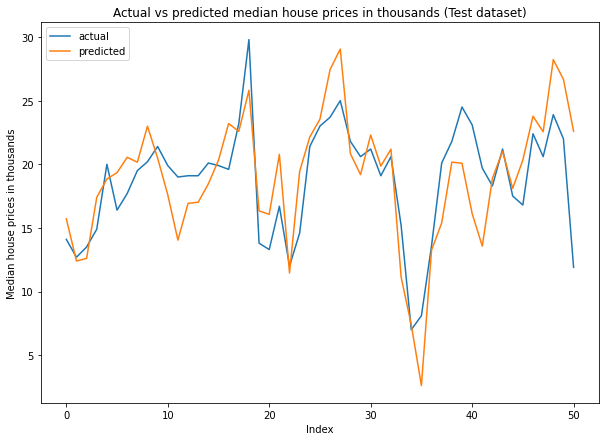

In [31]:
idx_test = [i for i in range(0, 51, 1)]
plt.figure(figsize=(10,7))
ax = sns.lineplot(x=idx_test, y=y_test, label="actual")
ax = sns.lineplot(x=idx_test, y=y_hat_test, label="predicted")
ax.set(xlabel='Index', ylabel='Median house prices in thousands', 
       title="Actual vs predicted median house prices in thousands (Test dataset)")

[Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'Difference between actual and predicted values'),
 Text(0.5, 1.0, 'Error between actual and predicted values')]

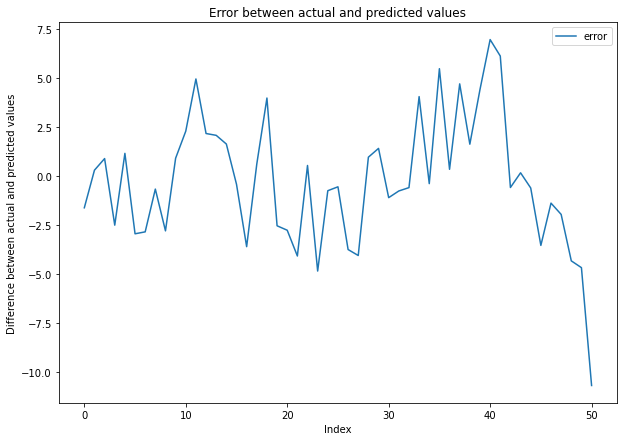

In [32]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(x=idx_test, y=y_test-y_hat_test, label="error")
ax.set(xlabel='Index', ylabel='Difference between actual and predicted values', 
       title="Error between actual and predicted values")

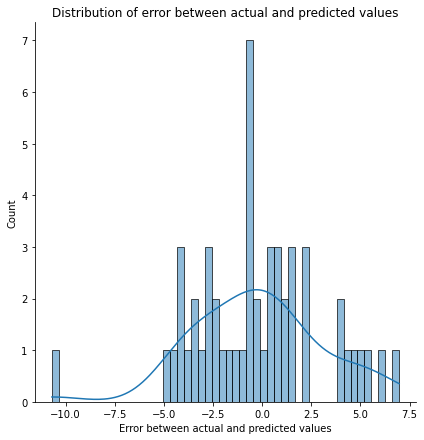

In [33]:
ax2 = sns.displot((y_test-y_hat_test),bins=50, kde=True, height=6)
ax2.set(xlabel='Error between actual and predicted values', ylabel='Count', 
       title="Distribution of error between actual and predicted values")

As per the above codes, we note the RMSE score for the train set to be higher than the test set. This means that the model fits the test data better and the error between the predicted and actual values are smaller in the test data.

However, the R squared value of the train set is higher than the test set, which means that the proportion of variance in the dependent variable that can be explained by the independent variables is much lesser (only at 43%) in the test set. Further improvement might be possible with [feature selection](#feature).

The accuracy of the model may not be ideal as the R squared score of 0.430 is considerably low. However, the RMSE score reflects an improvement over the train data. 

|Data|RMSE|Rsquare|
|----|----|-------|
|Train data|4.824|0.741|
|Test data|3.285|0.430|

<a id="r13">__Regression Equation (based on user-defined gradient descent function)__</a>

$MEDV = 23.973 - 8.280(CRIM) + 4.638(ZN) + 0.972(INDUS) + 2.543(CHAS) - 7.977(NOX) + 21.332(RM) + 1.0388(AGE) - 14.682(DIS) + 7.688(RAD) - 7.618(TAX) - 8.302(PTRATIO) + 4.206(B) - 19.605(LSTAT)$

## <a id="t9">Task 9 </a>

Using the official sklearn library to build the linear regression model, we recomputed the RMSE and Rsquare scores for the train and test set summarised in the table below. 

The difference between the RMSE and Rsquared score for the user-defined gradient descent function and official sklearn library is very small (between 0.001 and 0.004). Hence, the performance between both models are deemed to be similar. 

|Data|RMSE|Rsquare|
|----|----|-------|
|Train data|4.820|0.742|
|Test data|3.287|0.429|

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)
y_pred_train = reg.predict(X_train)

print("\nTrain RMSE using sklearn linear regression model:",
round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3))
print("\nTrain R2 using sklearn linear regression model:",
round(r2_score(y_train, y_pred_train),3))

y_pred_test = reg.predict(X_test)

print("\nTest RMSE using sklearn linear regression model:",
round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3))
print("\nTest R2 using sklearn linear regression model:",
round(r2_score(y_test, y_pred_test),3))


Train RMSE using sklearn linear regression model: 4.82

Train R2 using sklearn linear regression model: 0.742

Test RMSE using sklearn linear regression model: 3.287

Test R2 using sklearn linear regression model: 0.429


## <a id=feature>Feature Selection</a>

Using OLS in stats model, we will analyse the p-value of the input features and conduct backward elimination to remove any unnecessary features are present. 

In [35]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              697.6
Date:                Thu, 21 Apr 2022   Prob (F-statistic):                   6.52e-285
Time:                        13:13:24   Log-Likelihood:                         -1409.2
No. Observations:                 455   AIC:                                      2844.
Df Residuals:                     442   BIC:                                      2898.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
vif_cal(input_data=df_norm, dependent_col="MEDV")

,Var,Vif
9,TAX,24.55
6,AGE,19.61
5,RM,16.66
11,B,16.01
8,RAD,14.59
10,PTRATIO,13.34
2,INDUS,13.29
4,NOX,12.78
12,LSTAT,8.62
7,DIS,7.98


Based on the above analysis, the p-value of NOX is 0.075 (>0.05), and the VIF of NOX is 12.78 (>10). Hence, we will first drop the NOX column. 

In [37]:
lm2 = sm.OLS(y_train,X_train.drop(columns=['NOX'])).fit()
print(lm2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              751.7
Date:                Thu, 21 Apr 2022   Prob (F-statistic):                   1.13e-285
Time:                        13:13:24   Log-Likelihood:                         -1410.8
No. Observations:                 455   AIC:                                      2846.
Df Residuals:                     443   BIC:                                      2895.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
vif_cal(input_data=df_norm.drop(columns=["NOX"]), dependent_col="MEDV")

,Var,Vif
8,TAX,24.38
5,AGE,17.60
4,RM,16.36
10,B,15.90
7,RAD,14.37
9,PTRATIO,12.42
2,INDUS,11.87
11,LSTAT,8.33
6,DIS,7.72
1,ZN,2.84


After dropping the NOX column, we re-run the analysis and noted that the p-value and VIF of AGE is 0.110 (>0.05) and 17.60 (>10) respectively. As such, AGE column would be removed as well. 

In [39]:
lm3 = sm.OLS(y_train,X_train.drop(columns=['NOX', 'AGE'])).fit()
print(lm3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              817.0
Date:                Thu, 21 Apr 2022   Prob (F-statistic):                   1.39e-286
Time:                        13:13:24   Log-Likelihood:                         -1412.1
No. Observations:                 455   AIC:                                      2846.
Df Residuals:                     444   BIC:                                      2892.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
vif_cal(input_data=df_norm.drop(columns=["NOX", "AGE"]), dependent_col="MEDV")

,Var,Vif
7,TAX,24.28
9,B,15.26
6,RAD,14.33
4,RM,12.41
8,PTRATIO,12.38
2,INDUS,11.61
5,DIS,6.85
10,LSTAT,6.11
1,ZN,2.79
0,CRIM,2.09


Considering that there is no p-value that's greate than 0.05. All input features are deemed as significant at this point. However, the VIF score for tax is over 20 which reflect high multicollinearity with other independent variables. As such, we will remove the TAX column and proceed to rebuild the model based on the finalised features (without NOX, AGE and TAX).

In [41]:
lm4 = sm.OLS(y_train,X_train.drop(columns=['NOX', 'AGE', 'TAX'])).fit()
print(lm4.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              885.3
Date:                Thu, 21 Apr 2022   Prob (F-statistic):                   1.73e-286
Time:                        13:13:24   Log-Likelihood:                         -1415.8
No. Observations:                 455   AIC:                                      2852.
Df Residuals:                     445   BIC:                                      2893.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
vif_cal(input_data=df_norm.drop(columns=["NOX", "AGE", "TAX"]), dependent_col="MEDV")

,Var,Vif
8,B,15.26
4,RM,12.39
7,PTRATIO,12.32
2,INDUS,8.47
5,DIS,6.85
9,LSTAT,6.10
6,RAD,4.97
1,ZN,2.66
0,CRIM,2.09
3,CHAS,1.13


Referring to the correlation matrix above, the independent variables identified with high correlation with each other were all handled by dropping one of the columns. As such, we'll proceed to build the final model with the remaining features. 

## <a id="final">Final Linear Regression Model</a>

We will rebuild the model using user-defined gradient descent function and official sklearn library based on the finalised input features below. 

In [43]:
# Update input features based on feature selection results
X_train_final = X_train.drop(columns=['NOX', 'AGE', 'TAX'])
X_test_final = X_test.drop(columns=['NOX', 'AGE','TAX'])
print(X_train_final.shape)
print(X_train_final.shape)

(455, 10)
(455, 10)


In [44]:
y_hat_train_final, b_final, w_final, log_final = gradient_descent(X_train_final,y_train)

In [45]:
print(f"Bias or y-intercept: {b_final}")
print("Weights or coefficients: ", w_final)

Bias or y-intercept: 21.113621313817784
Weights or coefficients:  [ -7.67287892   4.07325032  -3.97964524   2.77376073  22.25461462
 -12.33708405   1.04645556  -6.54241857   4.39693436 -20.58830414]


In [46]:
print("Log of RMSE and R Square values for every 10 iterations")
log_final

Log of RMSE and R Square values for every 10 iterations


,RMSE,R squared
0,23.114166,-4.939775
10,7.477802,0.378328
20,6.711108,0.499272
30,6.278644,0.561727
40,5.973803,0.603251
...,...,...
960,5.006798,0.721302
970,5.006730,0.721310
980,5.006664,0.721317
990,5.006602,0.721324


In [47]:
y_hat_test_final = b_final + np.dot(X_test_final, w_final)

In [48]:
root_mse = rmse(y_test, y_hat_test_final)
r_squared = r2(y_test, y_hat_test_final)

print("11 Input Features:")
print(f"RMSE for test set: {root_mse:.3f}")
print(f"R_squared for test set: {r_squared:.3f}")

11 Input Features:
RMSE for test set: 3.229
R_squared for test set: 0.449


[Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'Median house prices in thousands'),
 Text(0.5, 1.0, 'Actual vs predicted median house prices in thousands (Final Train data set)')]

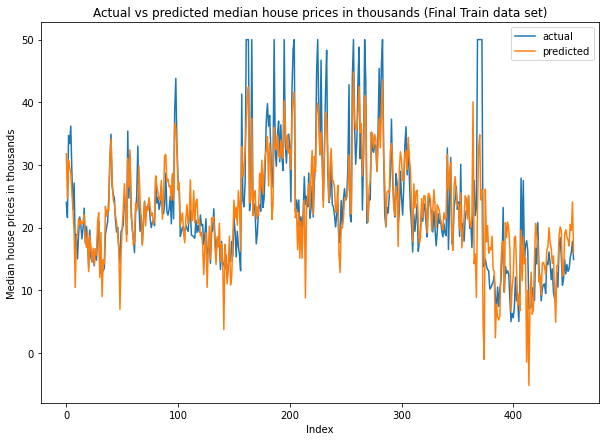

In [49]:
idx = [i for i in range(0, 455, 1)]
plt.figure(figsize=(10,7))
ax = sns.lineplot(x=idx, y=y_train, label="actual")
ax = sns.lineplot(x=idx, y=y_hat_train_final, label="predicted")
ax.set(xlabel='Index', ylabel='Median house prices in thousands', 
       title="Actual vs predicted median house prices in thousands (Final Train data set)")

[Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'Median house prices in thousands'),
 Text(0.5, 1.0, 'Actual vs predicted median house prices in thousands (Final Test data set)')]

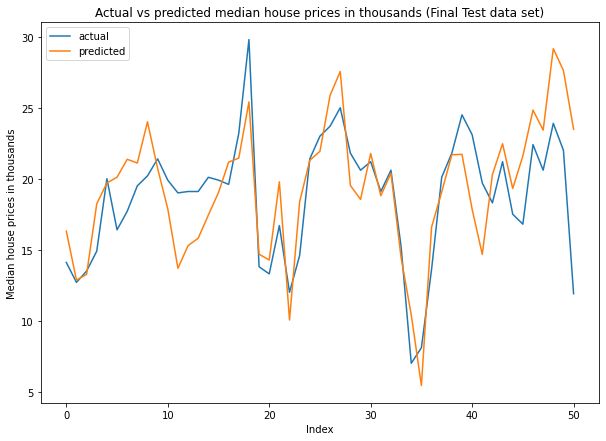

In [50]:
idx_test = [i for i in range(0, 51, 1)]
plt.figure(figsize=(10,7))
ax = sns.lineplot(x=idx_test, y=y_test, label="actual")
ax = sns.lineplot(x=idx_test, y=y_hat_test_final, label="predicted")
ax.set(xlabel='Index', ylabel='Median house prices in thousands', 
       title="Actual vs predicted median house prices in thousands (Final Test data set)")

[Text(0.5, 0, 'Index'),
 Text(0, 0.5, 'Difference between actual and predicted values'),
 Text(0.5, 1.0, 'Error between actual and predicted values in Final model')]

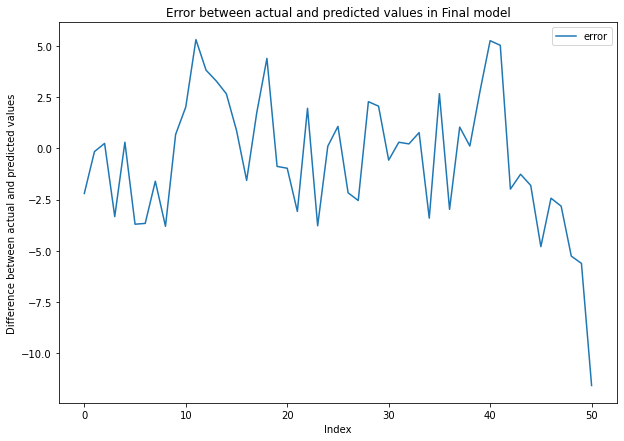

In [51]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(x=idx_test, y=y_test-y_hat_test_final, label="error")
ax.set(xlabel='Index', ylabel='Difference between actual and predicted values', 
       title="Error between actual and predicted values in Final model")

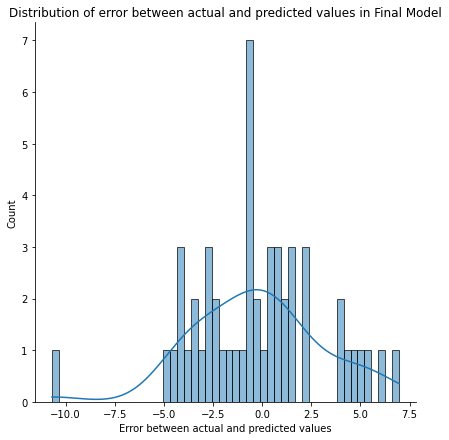

In [52]:
ax2 = sns.displot((y_test-y_hat_test),bins=50, kde=True, height=6)
ax2.set(xlabel='Error between actual and predicted values', ylabel='Count', 
       title="Distribution of error between actual and predicted values in Final Model")

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train_final, y_train)
y_pred_train = reg.predict(X_train_final)

print("\nTrain RMSE using sklearn linear regression model:",
round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3))
print("\nTrain R2 using sklearn linear regression model:",
round(r2_score(y_train, y_pred_train),3))

y_pred_test = reg.predict(X_test_final)

print("\nTest RMSE using sklearn linear regression model:",
round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3))
print("\nTest R2 using sklearn linear regression model:",
round(r2_score(y_test, y_pred_test),3))


Train RMSE using sklearn linear regression model: 5.005

Train R2 using sklearn linear regression model: 0.721

Test RMSE using sklearn linear regression model: 3.222

Test R2 using sklearn linear regression model: 0.451


## Findings 

After feature selection, we noted a slight improvement in the RMSE scores and R squared values in the test data. However, the RMSE scores and R squared values for train data has deteriorated slightly. There could be a possibility that the model tuned itself slightly to reduce fitting of the noise in the train data set. However, the improvement is deemed to be minor and insignificant as compared to the model built on all 13 features. 

A reduction in the number of input features helps to save computation resources required for the model.

__Final Model (10 input features) User-defined gradient descent function__

|Data|RMSE|Rsquare|
|----|----|-------|
|Train data|5.006|0.721|
|Test data|3.229|0.449|

__Final Model (10 input features) Official Sklearn library: Linear Regression__

|Data|RMSE|Rsquare|
|----|----|-------|
|Train data|5.005|0.721|
|Test data|3.222|0.451|

<a id="r10">__Final Regression Equation (based on user-defined model)__</a>

$MEDV = 21.066 - 7.719(CRIM) + 4.068(ZN) - 3.967(INDUS) + 2.772(CHAS) + 22.294(RM) - 12.314(DIS) + 1.054(RAD) - 6.540(PTRATIO) + 4.404(B) - 20.561(LSTAT)$

## <a id="acknowledgement"> Acknowledgements</a>

1. [Scikit Learn: Linear Regression Source Code](https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/linear_model/_base.py#L507)
2. [Statlogy: RMSE vs. R-Squared: Which Metric Should You Use](https://www.statology.org/rmse-vs-r-squared/#:~:text=Both%20RMSE%20and%20R2,response%20variable%20in%20percentage%20terms.)
3. [Seaborn Official Documentation](https://seaborn.pydata.org/index.html)
4. [Towards Data Science: Gradient Descent Algorithm - a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)
5. [Wikipedia: Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)